<a href="https://colab.research.google.com/github/nureeee/Machhine-Learning/blob/main/210614_%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5_%EC%9E%90%EC%A0%84%EA%B1%B0%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가설세우기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [ ]:
bike  = pd.read_csv('/content/drive/MyDrive/bike_train.csv')

# 데이터 기본 정보 확인하기

In [ ]:
bike.info()
# 해야될 일
# NaN값이 없음 
# datetime 컬럼의 object타입을 datetime타입으로 바꾸기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 전체 데이터 프레임보기

In [ ]:
bike.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


## datetime이 얼마나 있는지 확인

In [ ]:
bike.tail(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10866,2012-12-19 04:00:00,4,0,1,1,9.84,12.120,75,8.9981,1,6,7
10867,2012-12-19 05:00:00,4,0,1,1,10.66,14.395,75,6.0032,2,29,31
10868,2012-12-19 06:00:00,4,0,1,1,9.84,12.880,75,6.0032,3,109,112
10869,2012-12-19 07:00:00,4,0,1,1,10.66,13.635,75,8.9981,3,360,363
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317
10872,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,164
10873,2012-12-19 11:00:00,4,0,1,1,16.40,20.455,54,15.0013,31,169,200
10874,2012-12-19 12:00:00,4,0,1,1,16.40,20.455,54,19.0012,33,203,236
10875,2012-12-19 13:00:00,4,0,1,1,17.22,21.210,50,12.9980,30,183,213


# 히스토그램 보기

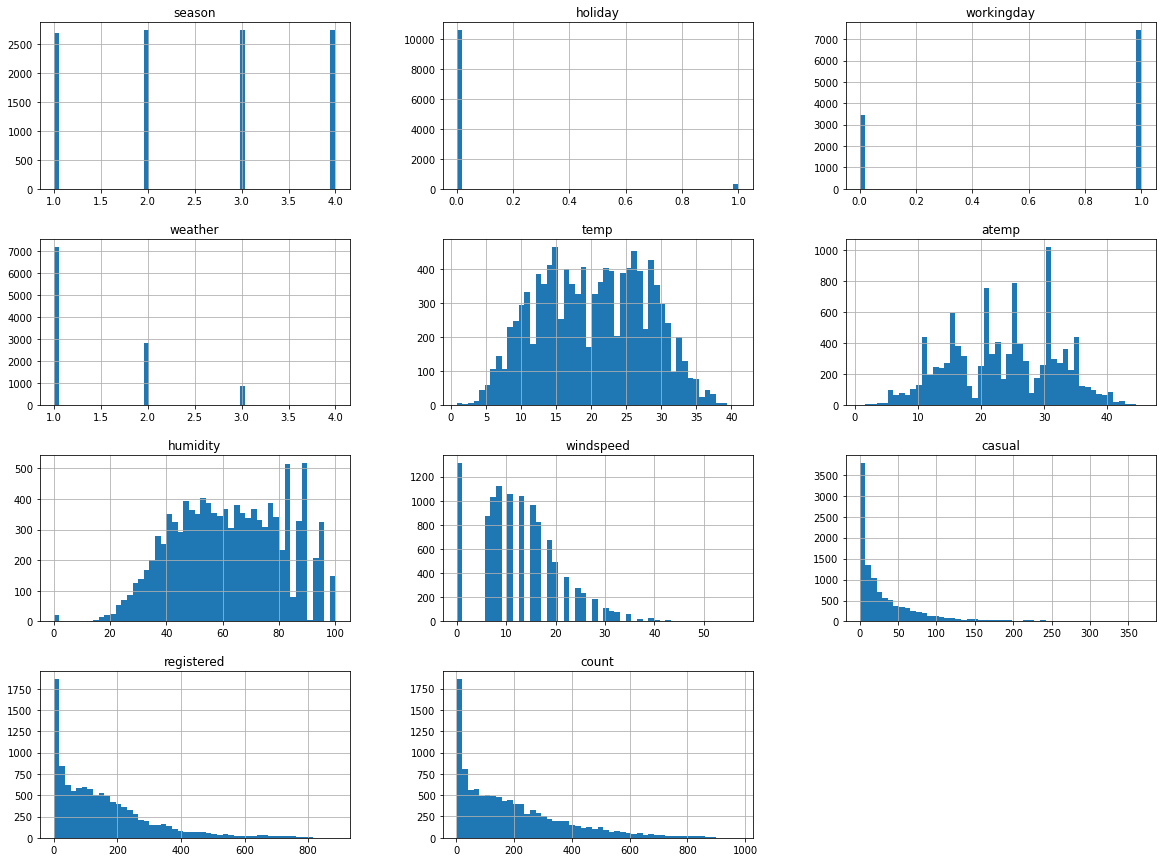

In [ ]:
bike.hist(bins=50, figsize=(20, 15))
plt.show()

## 데이터에서 월별로 1일부터 19일까지밖에 없는지 확인


In [ ]:
# 무식한 방법이지만 1월 20일이후 데이터를 확인해봤더니 없었다.
bike[bike['datetime'] == '2011-01-20 00:00:00']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [ ]:
# 2월도 똑같다.
bike[bike['datetime'] == '2011-02-20 00:00:00']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


## 위와 같은 확인으로
 temp히스토그램의 이상이 20일 이후의 데이터가 없어서 그런거라고 생각

# 날짜 변환하기(datetime 타입)

In [ ]:
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

### datetime을 date와 time으로 나눠볼려했으나 힘듦

In [ ]:
# bike['datetime'] = bike['datetime'].astype('string')
# bike['datetime']

In [ ]:
# 시리즈에 모두 적용하는방법 잘 모름
# apply같은데 잘못하겠음
# bike['datetime'][0].split()

In [ ]:
bike[(bike['datetime'].dt.year == 2011) & (bike['datetime'].dt.month == 1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
426,2011-01-19 19:00:00,1,0,1,1,13.12,14.395,57,27.9993,4,108,112
427,2011-01-19 20:00:00,1,0,1,1,13.12,15.150,49,19.9995,2,74,76
428,2011-01-19 21:00:00,1,0,1,1,13.12,14.395,49,27.9993,4,55,59
429,2011-01-19 22:00:00,1,0,1,1,12.30,15.150,52,11.0014,6,53,59


In [ ]:
# datetime으로 2011년도 다 가져오면서 월별로 묶어서 합계를 내라
# 2011년도 월별 총 사용량 casual, registered, count
temp1 = bike.loc[(bike['datetime'].dt.year == 2011), ['casual', 'registered', 'count']].groupby(bike['datetime'].dt.month).sum()

# 2011년도 월별 사용자 plot그래프 확인

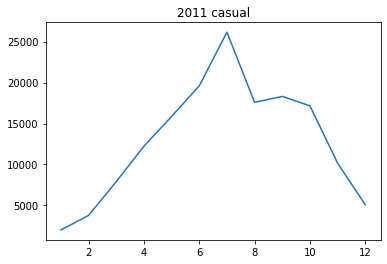

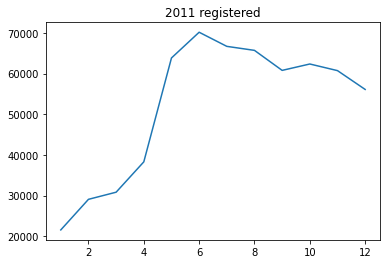

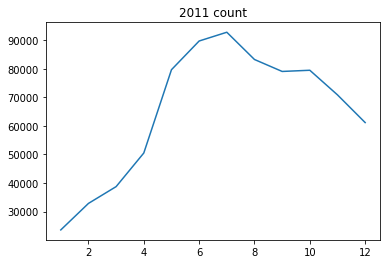

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(temp1.loc[:, 'casual'])
plt.title('2011 casual')
plt.figure()

plt.plot(temp1.loc[:, 'registered'])
plt.title('2011 registered')
plt.figure()

plt.plot(temp1.loc[:, 'count'])
plt.title('2011 count')
plt.figure()
plt.show()


# 2012년도 월별 사용자 plot그래프 확인

In [ ]:
# datetime으로 2012년도 다 가져오면서 월별로 묶어서 합계를 내라
# 2012년도 월별 총 사용량 casual, registered, count
temp2 = bike.loc[(bike['datetime'].dt.year == 2012), ['casual', 'registered', 'count']].groupby(bike['datetime'].dt.month).sum()

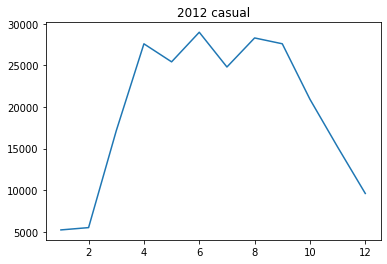

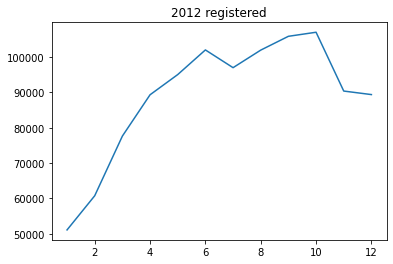

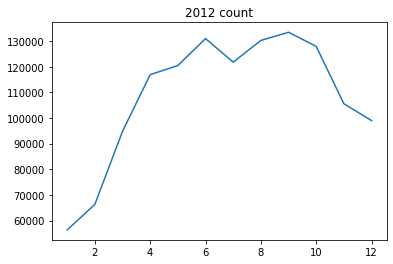

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(temp2.loc[:, 'casual'])
plt.title('2012 casual')
plt.figure()

plt.plot(temp2.loc[:, 'registered'])
plt.title('2012 registered')
plt.figure()

plt.plot(temp2.loc[:, 'count'])
plt.title('2012 count')
plt.figure()
plt.show()


# 코랩 커맨드 배움

### 구간 나누기 (pd.cut)

In [ ]:
bike['temp_cut'] = pd.cut(
    bike['temp'],
    bins=[0, 10, 20, 30, np.inf],
    labels=[1, 2, 3, 4],
        
)
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_cut
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2


# 컬럼을 잘못 만들었어서 drop함

In [ ]:
# bike.drop(['bike_cut'], axis=1, inplace=True)

In [ ]:
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_cut
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2


In [ ]:
bike['temp_cut'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

# 데이터 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


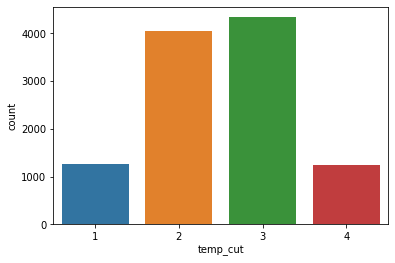

In [ ]:
# 10~30도 까지의 구간의 데이터 수가 많다.
sns.countplot(bike['temp_cut'])
plt.show()

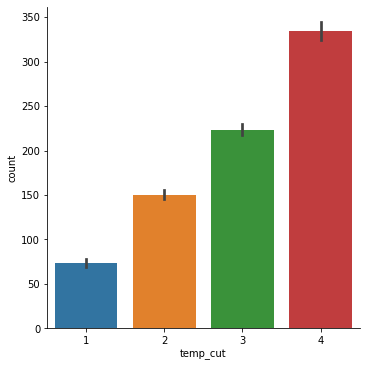

In [ ]:
sns.catplot(
    x='temp_cut',
    y='count',
    data=bike,
    kind='bar'
)
plt.show()

# 온도 구간별 이용자 수 바 그래프

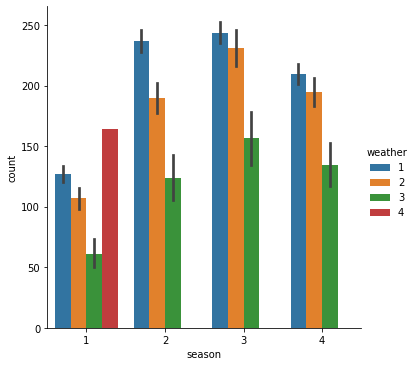

In [ ]:
# 온도 
sns.catplot(
    x='season',
    y='count',
    data=bike,
    kind='bar',
    hue='weather'
)
plt.show()

In [ ]:
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_cut
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2


### 시간대별 사용량 확인

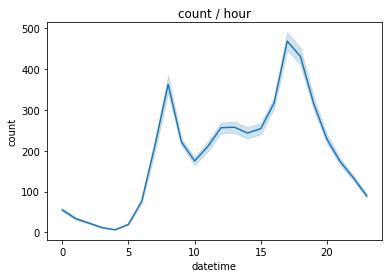

In [ ]:
sns.lineplot(
    x=bike['datetime'].dt.hour,
    y='count',
    data=bike,
    # kind='line'

)
plt.figsize=(30, 22)
plt.title('count / hour')
plt.show()
# 저기 파란색 범위가 뭔지 모르겠음

In [ ]:
bike['hum_cut'] = pd.cut(
    bike['temp'],
    bins=[0, 10, 20, 30, np.inf],
    labels=[1, 2, 3, 4],
        
)
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_cut,hum_cut
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2,2


## 연도별 자전거 사용량 비교 그래프
 * 11년도에 비하여, 12년도의 사용량이 증가하였다.
 * 배차 수 증가 및 공공자전거 정보가 퍼지며, 확실히 증가하였다.
 * 허나, 계절의 영향은 11년도 12년도 똑같이 반영되어, 날씨가 풀리면서 사용량이 증가하고, 기온이 낮아지면서 줄어드는 모습을 볼 수 있다.
 

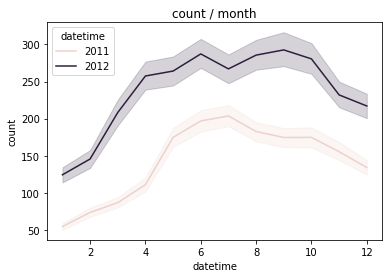

In [ ]:
sns.lineplot(
    x=bike['datetime'].dt.month,
    y='count',
    data=bike,
    # kind='line'
    hue = bike['datetime'].dt.year
)

plt.figsize=(30, 22)
plt.title('count / month')
plt.show()

#날씨에 대한 공공자전거 회원/비회원의 사용량 비율
 * 

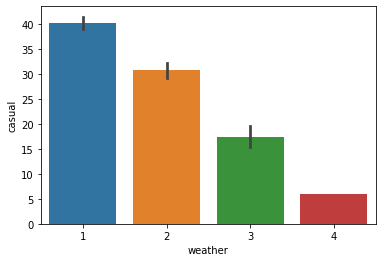

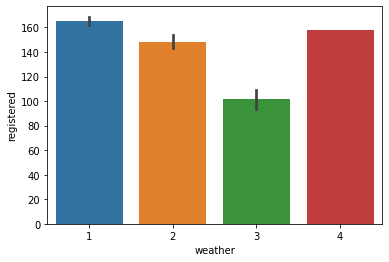

In [ ]:
sns.barplot(
    x='weather',
    y='casual',
    data=bike,
    # kind='bar',
    # hue=['']
)
plt.figure()
sns.barplot(
    x='weather',
    y='registered',
    data=bike,
    # kind='bar',
    # hue=['']
)
plt.show()

In [ ]:
bike[bike['humidity'] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_cut,hum_cut
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3,2,2
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2,2,2
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1,2,2
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3,2,2
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12,2,2
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37,2,2
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44,2,2
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24,2,2
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17,2,2
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11,2,2


In [ ]:
bike[bike['windspeed'] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_cut,hum_cut
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2,2
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2,2
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2,2
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2,2


# 머신러닝을 위한 데이터 분석
- 데이트 타임을 시간으로 바꿔서(0 ~ 23), 시간대별로 사용자를 확인.
---
- Humidity, Windspeed 의 0값을 중간값으로 대체한다. replace
---
- 온도를 구간별로 나눠서(0, 10, 20, 30, ~) 데이터를 계층적으로 나눈다.  
 - trainset , validset을 나눌 때, 온도 구간별 계층적으로 나눈다. 
----




# 머신러닝을 위한 데이터 

### 데이터 불러오기

In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/bike_train.csv')

### 데이터프레임 확인

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Train Set, Test Set 분류




### 데이터프레임의 데이터타입 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


datetime이 object이므로 DateTime으로 바꿔야한다.

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## Datetime을 시간별로 인코딩


In [ ]:
df.loc[:, "datetime"]


0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [ ]:
df['datetime'] = df.loc[:, 'datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,1,0,0,1,9.84,14.395,81,12.9980,3,13,16
1,1,1,0,0,1,9.02,13.635,80,12.9980,8,32,40
2,2,1,0,0,1,9.02,13.635,80,12.9980,5,27,32
3,3,1,0,0,1,9.84,14.395,75,12.9980,3,10,13
4,4,1,0,0,1,9.84,14.395,75,12.9980,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,22,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### datetime을 0~23으로 수치데이터로 바꾸려는데
굳이 ordinalEncoder를 사용할 필요가 없었다.

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# time_cat = df.loc[:, 'datetime'].dt.hour

# time_cat_encoded = ordinal_encoder.fit_transform(time_cat.values)

# time_cat_encoded[:23]

AttributeError: ignored

## Humidity, Windspeed 의 0값을 Nan값으로 변환 후, imputer로 중간값 처리.

### humidity, windspeed를 0을 NaN값으로 변환

In [ ]:
# df.loc['humidity'] 
df.loc[:, 'humidity'].replace(0, df.loc[:, 'humidity'].median(), inplace=True)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.loc[:, 'windspeed'].replace(0, df.loc[:, 'windspeed'].median(), inplace=True)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,1,0,0,1,9.84,14.395,81,12.9980,3,13,16
1,1,1,0,0,1,9.02,13.635,80,12.9980,8,32,40
2,2,1,0,0,1,9.02,13.635,80,12.9980,5,27,32
3,3,1,0,0,1,9.84,14.395,75,12.9980,3,10,13
4,4,1,0,0,1,9.84,14.395,75,12.9980,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,22,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## df에서 target과 features로 나눈다.

In [ ]:
target = ['casual', 'registered', 'count']
df_target = df[target]


In [ ]:
df_features = df.drop(target, axis=1)
df_features

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,0,1,0,0,1,9.84,14.395,81,12.9980
1,1,1,0,0,1,9.02,13.635,80,12.9980
2,2,1,0,0,1,9.02,13.635,80,12.9980
3,3,1,0,0,1,9.84,14.395,75,12.9980
4,4,1,0,0,1,9.84,14.395,75,12.9980
...,...,...,...,...,...,...,...,...,...
10881,19,4,0,1,1,15.58,19.695,50,26.0027
10882,20,4,0,1,1,14.76,17.425,57,15.0013
10883,21,4,0,1,1,13.94,15.910,61,15.0013
10884,22,4,0,1,1,13.94,17.425,61,6.0032


## 상관관계 분석

In [ ]:
corr_matrix = df_features.corr()
corr_matrix["humidity"].sort_values(ascending=False)

humidity      1.000000
weather       0.426042
season        0.183755
holiday       0.000821
workingday   -0.006491
atemp        -0.047393
temp         -0.069253
datetime     -0.280317
windspeed    -0.314033
Name: humidity, dtype: float64

## Train Set, Test Set 나누기

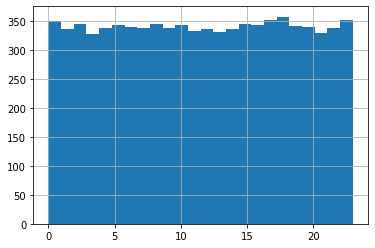

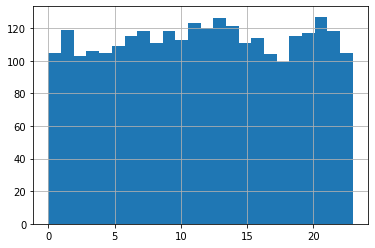

In [ ]:
from sklearn.model_selection import train_test_split
# X가 features, y가 target
X_train, X_test, y_train, y_test = train_test_split(
    df_features, 
    df_target['casual'], 
    random_state=42,
    # stratify=df_features['datetime']
)
X_train['datetime'].hist(bins=24)
plt.figure()
X_test['datetime'].hist(bins=24)
plt.show()

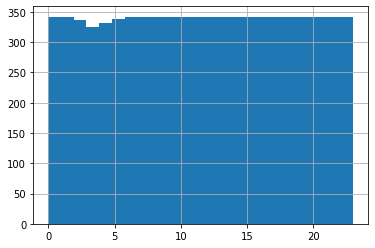

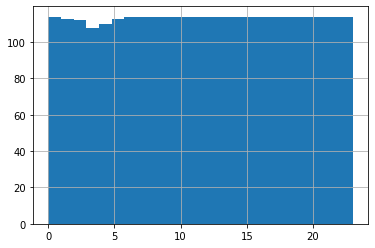

In [ ]:
from sklearn.model_selection import train_test_split
# X가 features, y가 target
X_train, X_test, y_train, y_test = train_test_split(
    df_features, 
    df_target['casual'], 
    random_state=42,
    stratify=df_features['datetime']
)
X_train['datetime'].hist(bins=24)
plt.figure()
X_test['datetime'].hist(bins=24)
plt.show()

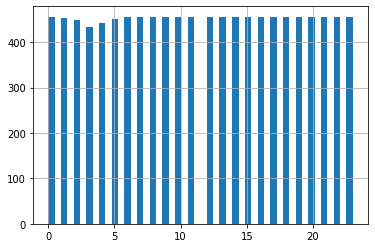

In [ ]:
df["datetime"].hist(bins=48)

In [ ]:
df.hist?

## 선형회귀 알고리즘 사용
선형회귀 알고리즘은 회귀 아니고 분류?

## 모델 선정 및 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit( X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 모델 예측

In [ ]:
lin_reg.predict(X_test)

array([ 84.09306796,  48.0282098 ,  39.28854604, ...,  31.67513174,
        48.10287706, 115.59495778])

## 모델 평가


In [ ]:
lin_reg.score(X_test, y_test)

0.4764563990267914

#MSE 를 통한 오차 확인


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)
    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()
def mse_eval(name_, pred, actual):
    global predictions
    global colors
    plot_predictions(name_, pred, actual)
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    length = len(df)
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    plt.show()
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(n_jobs = -1)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
pred = model.predict(X_test)

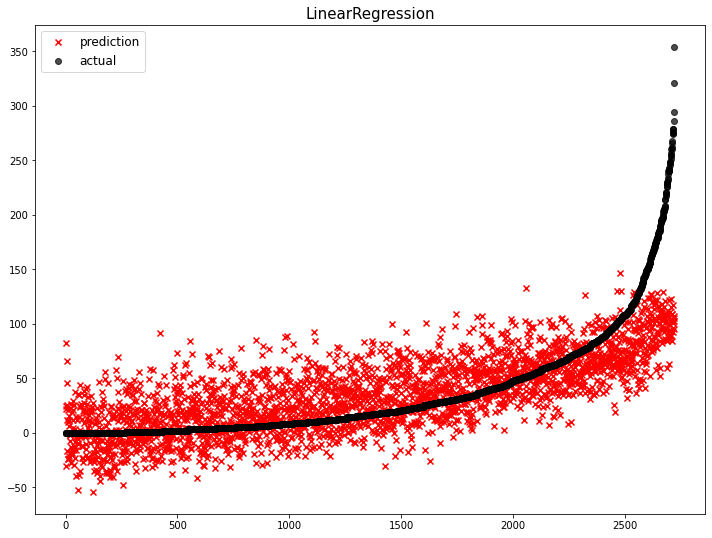

              model          mse
0  LinearRegression  1265.309302


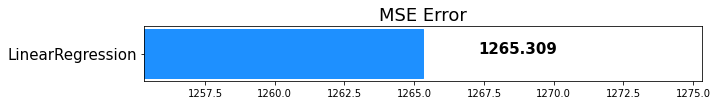

In [ ]:
mse_eval('LinearRegression', pred, y_test)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

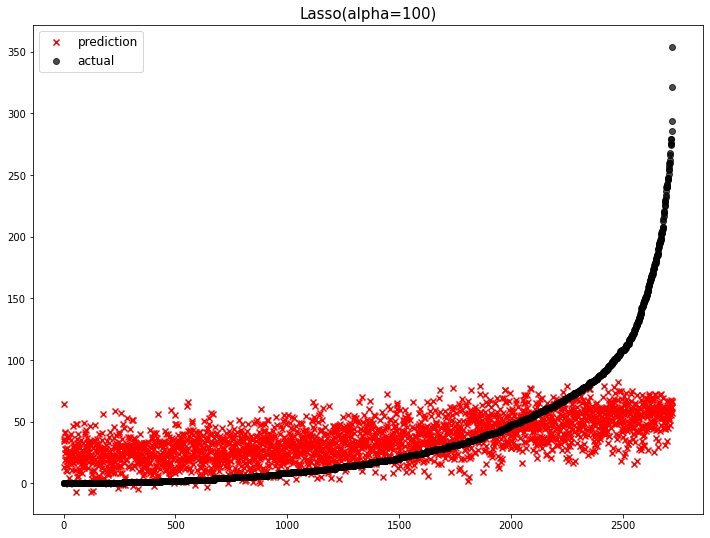

              model          mse
0  Lasso(alpha=100)  1781.569352
1  LinearRegression  1265.309302


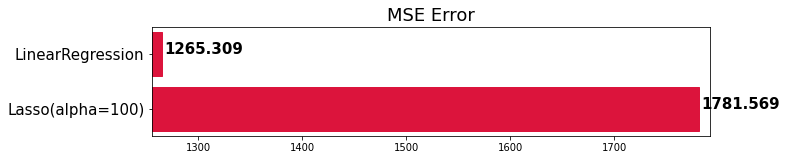

Lasso(alpha=100) Train Score : 0.2588765826811703 / test Score : 0.262844877156193


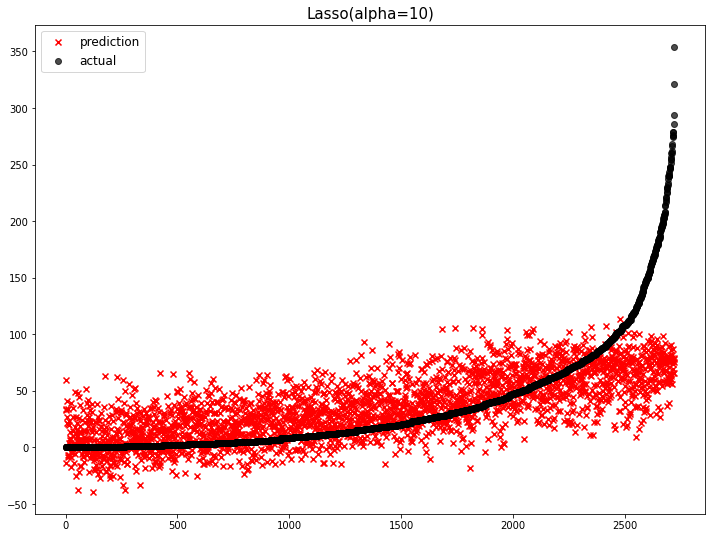

              model          mse
0  Lasso(alpha=100)  1781.569352
1   Lasso(alpha=10)  1548.567304
2  LinearRegression  1265.309302


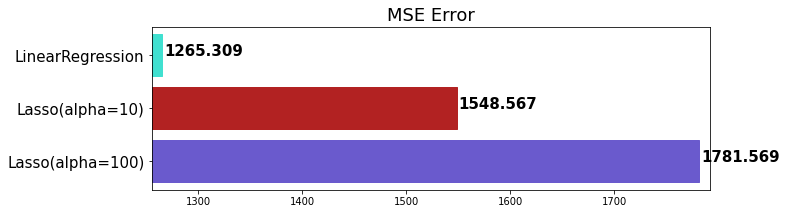

Lasso(alpha=10) Train Score : 0.34368303652502785 / test Score : 0.3592535034030844


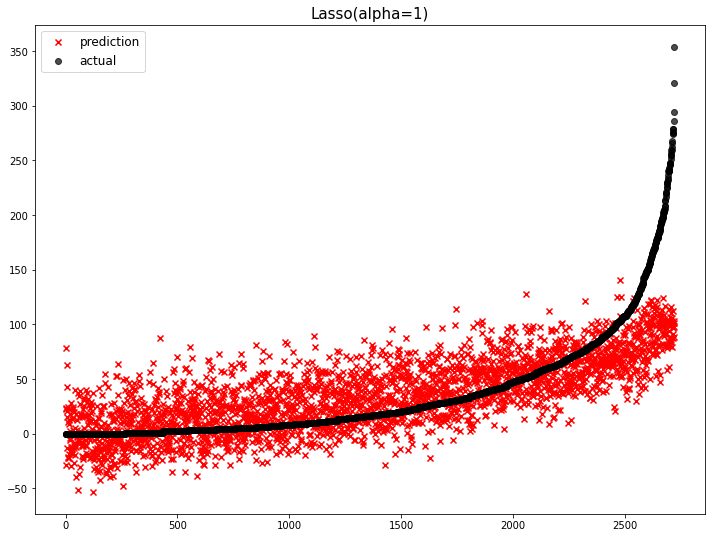

              model          mse
0  Lasso(alpha=100)  1781.569352
1   Lasso(alpha=10)  1548.567304
2    Lasso(alpha=1)  1277.240550
3  LinearRegression  1265.309302


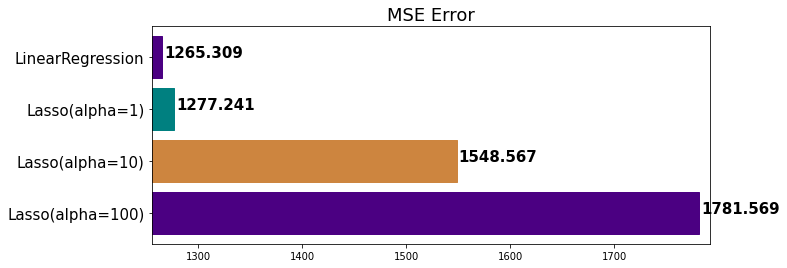

Lasso(alpha=1) Train Score : 0.45531974407067616 / test Score : 0.4715196388442151


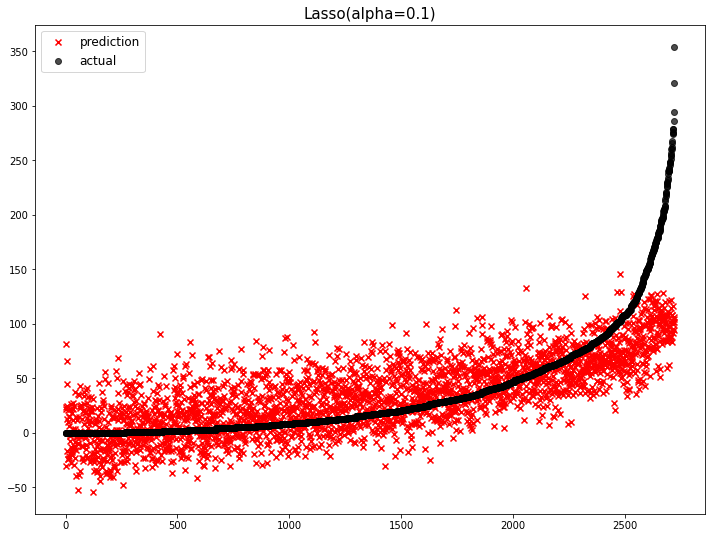

              model          mse
0  Lasso(alpha=100)  1781.569352
1   Lasso(alpha=10)  1548.567304
2    Lasso(alpha=1)  1277.240550
3  LinearRegression  1265.309302
4  Lasso(alpha=0.1)  1264.958733


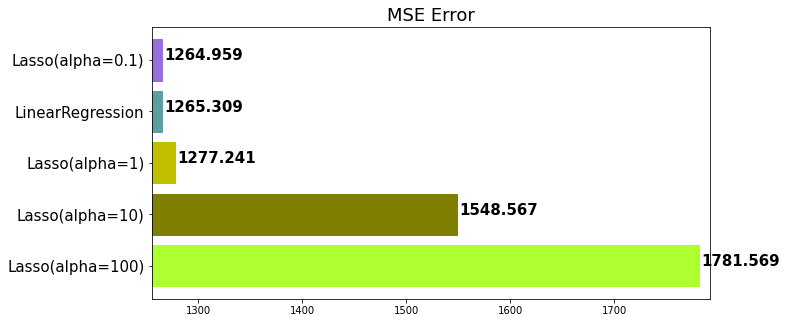

Lasso(alpha=0.1) Train Score : 0.45986086866699233 / test Score : 0.4766014532892675


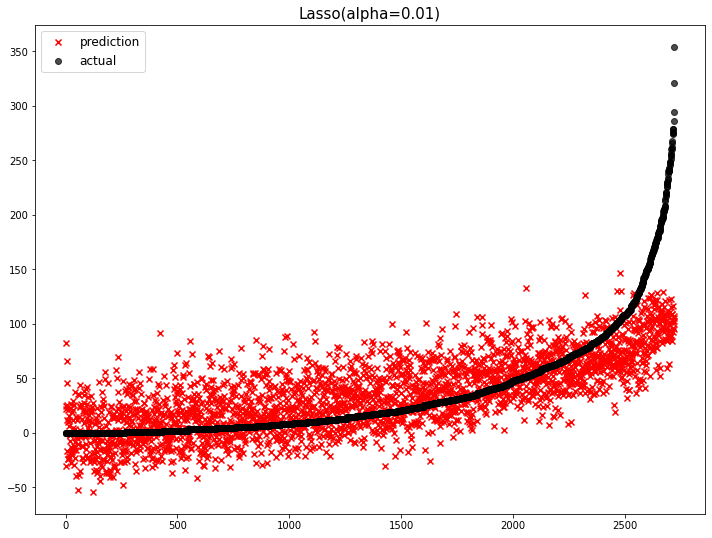

               model          mse
0   Lasso(alpha=100)  1781.569352
1    Lasso(alpha=10)  1548.567304
2     Lasso(alpha=1)  1277.240550
3   LinearRegression  1265.309302
4  Lasso(alpha=0.01)  1265.221524
5   Lasso(alpha=0.1)  1264.958733


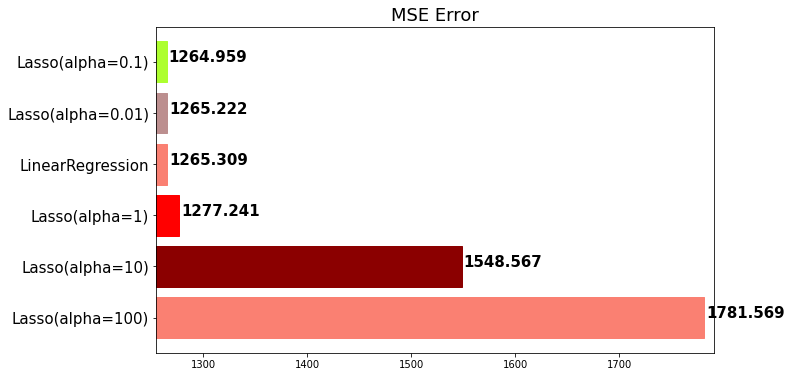

Lasso(alpha=0.01) Train Score : 0.4600838190488221 / test Score : 0.47649271866873855


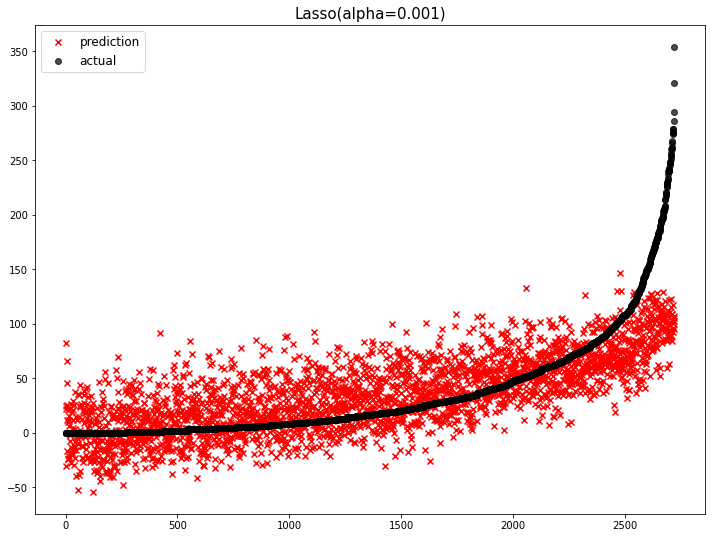

                model          mse
0    Lasso(alpha=100)  1781.569352
1     Lasso(alpha=10)  1548.567304
2      Lasso(alpha=1)  1277.240550
3    LinearRegression  1265.309302
4  Lasso(alpha=0.001)  1265.300033
5   Lasso(alpha=0.01)  1265.221524
6    Lasso(alpha=0.1)  1264.958733


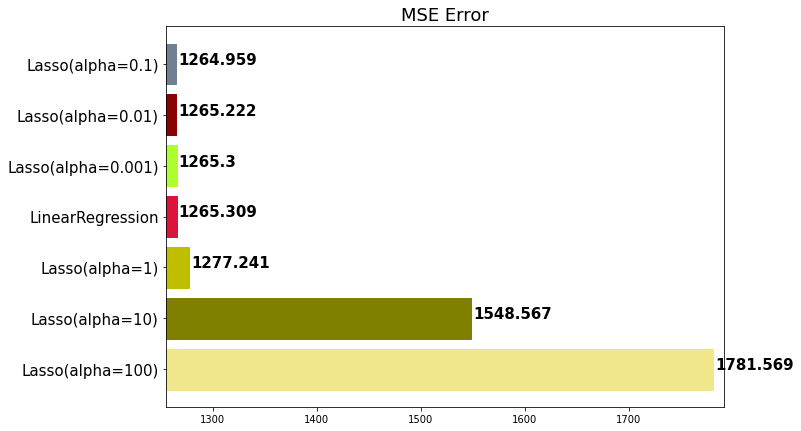

Lasso(alpha=0.001) Train Score : 0.460086050713381 / test Score : 0.4764602343343376


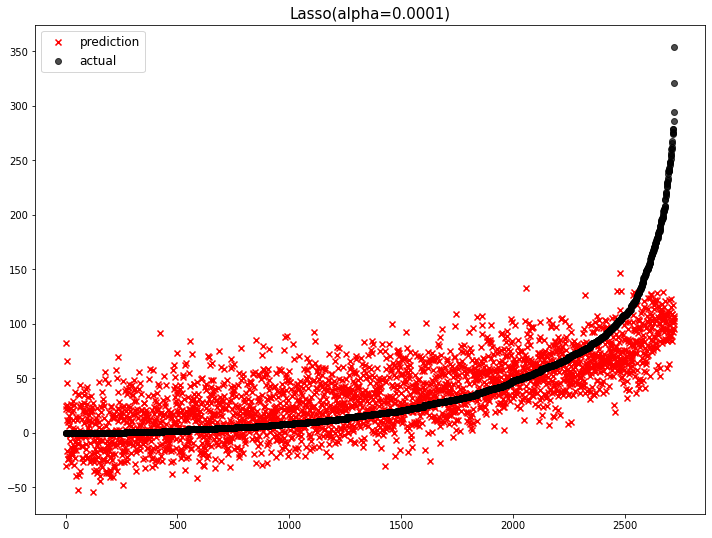

                 model          mse
0     Lasso(alpha=100)  1781.569352
1      Lasso(alpha=10)  1548.567304
2       Lasso(alpha=1)  1277.240550
3     LinearRegression  1265.309302
4  Lasso(alpha=0.0001)  1265.308372
5   Lasso(alpha=0.001)  1265.300033
6    Lasso(alpha=0.01)  1265.221524
7     Lasso(alpha=0.1)  1264.958733


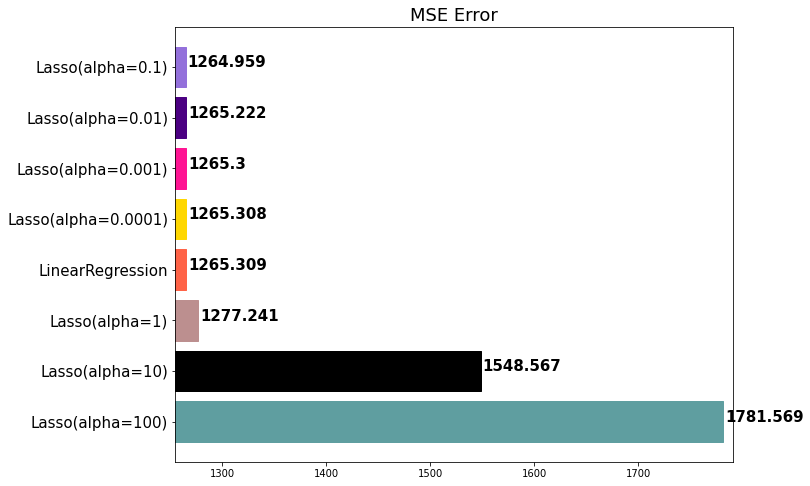

Lasso(alpha=0.0001) Train Score : 0.4600860730261693 / test Score : 0.4764567841182465


In [ ]:
for alpha in alphas:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train, y_train)
  pred = lasso.predict(X_test)
  mse_eval(f"Lasso(alpha={alpha})", pred, y_test)
  train_score = lasso.score(X_train, y_train)
  test_score = lasso.score(X_test, y_test)
  print(f"Lasso(alpha={alpha}) Train Score : {train_score} / test Score : {test_score}")